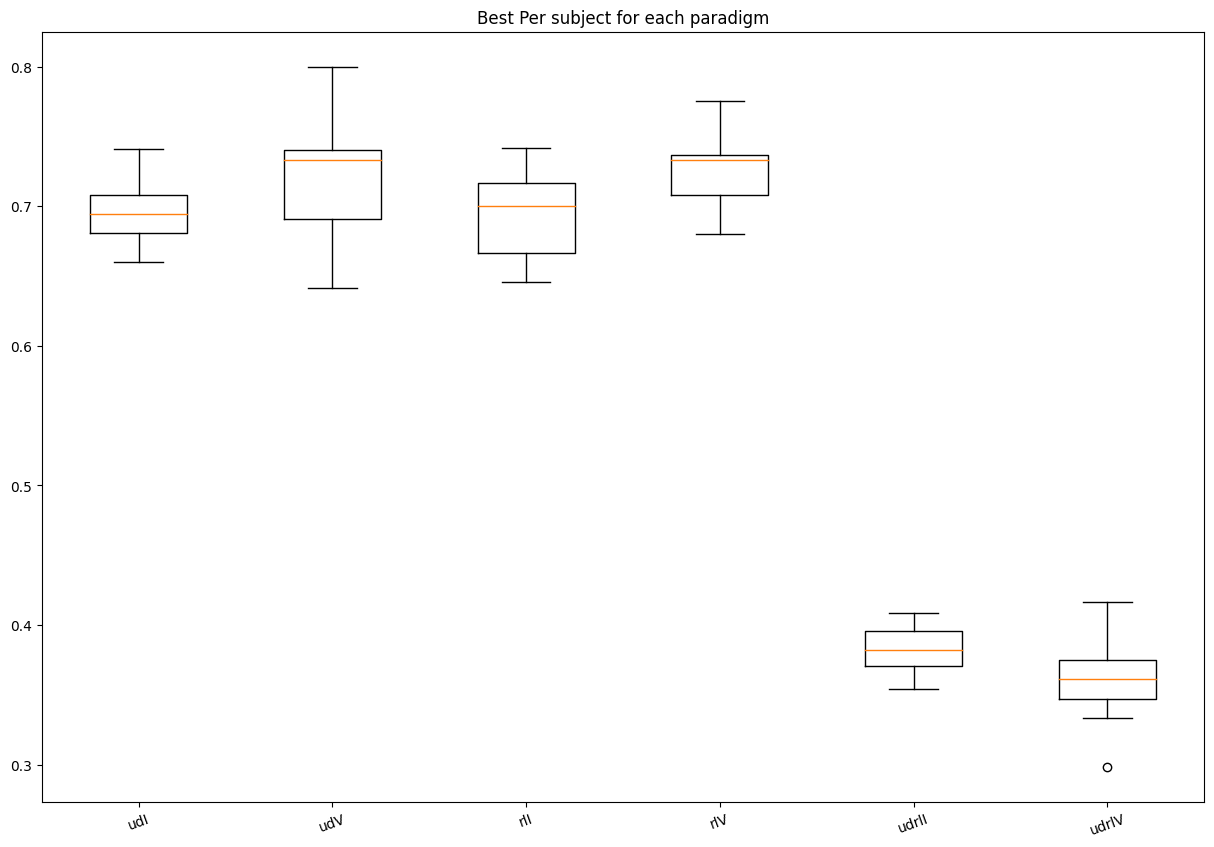

In [42]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

genSavePath = f"{os.getcwd()}/topFeaturesResults/"

paradigms = ["ud", "rl", "udrl"]
types = ["I","V"]
comboNr = [1,2,3,4]
results = []
for para in paradigms:
    for type in types:
        for nr in comboNr:
            path = glob.glob(genSavePath + f"top{nr}{para}{type}*")
            if len(path) > 0:
                topFeatures = path
        if len(topFeatures)>0:
            results.append(np.load(topFeatures[0], allow_pickle=True))
# print(len(results))
results = np.array(results,dtype=object)
# print(results.shape) # Paradigm, subject, top2, [acc, sub, name, kern, C]
# print(results[0])
# print(results[0,0])
# print(results[1])
results = results[:,:,0,:]
# print(results[0,1,1])
# print(results[0,1])
bestPerSub = np.zeros([results.shape[0], results.shape[1]])
for ind, para in enumerate(results):
    for subj in para:
        # print(subj[0])
        # print(int(subj[1]))
        bestPerSub[ind, int(subj[1])-1] = subj[0]
bestPerSub = np.array(bestPerSub)
plt.figure(figsize=[15,10])
plt.boxplot(bestPerSub.T)
combos = []
for para in paradigms:
    for type in types:
        combos.append(f"{para}{type}")
#plt.legend(combos)
plt.xticks(np.arange(len(combos))+1, combos,rotation=20)
plt.title("Best Per subject for each paradigm")
print("")

(18, 8)
(18, 8)
(18, 8)
(18, 8)
(36, 8)
(36, 8)


<Figure size 640x480 with 0 Axes>

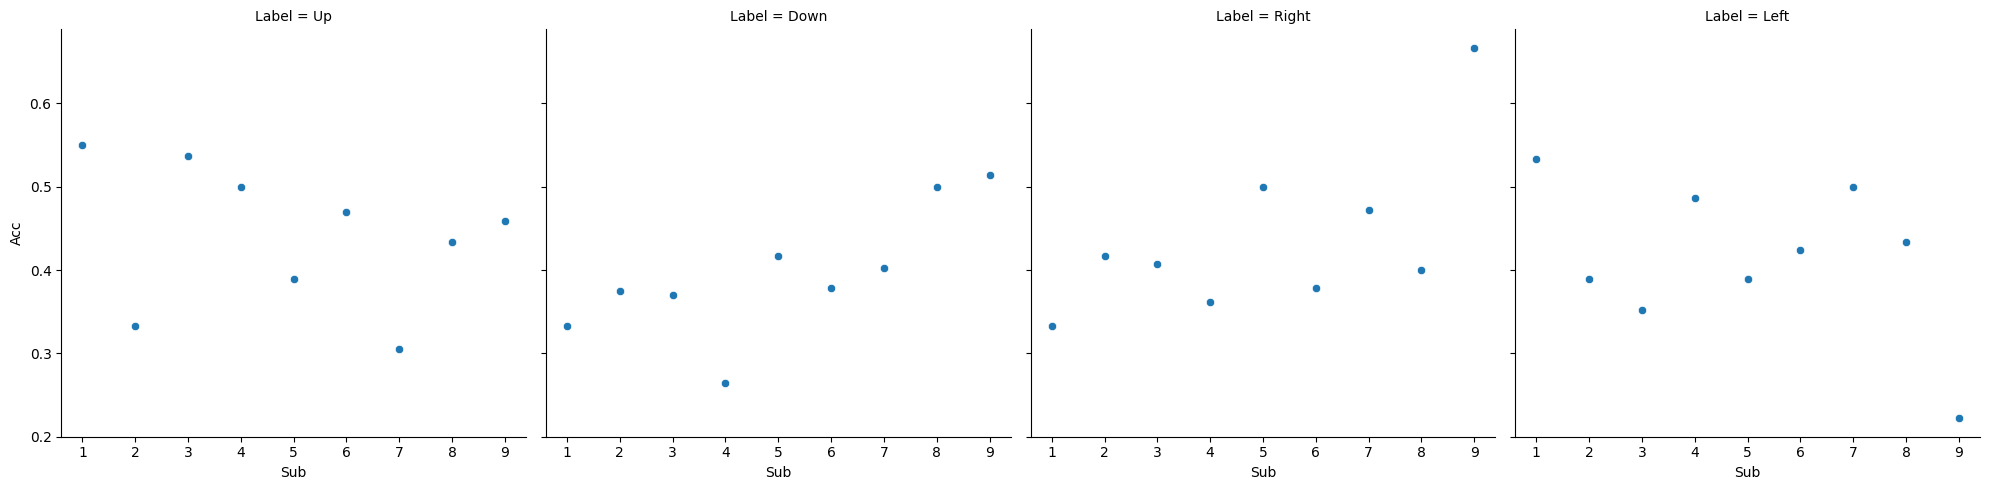

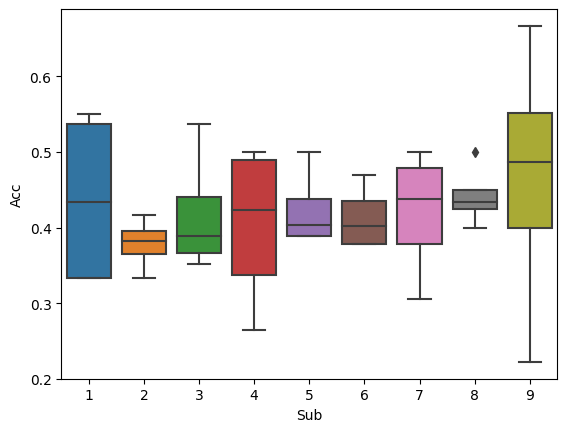

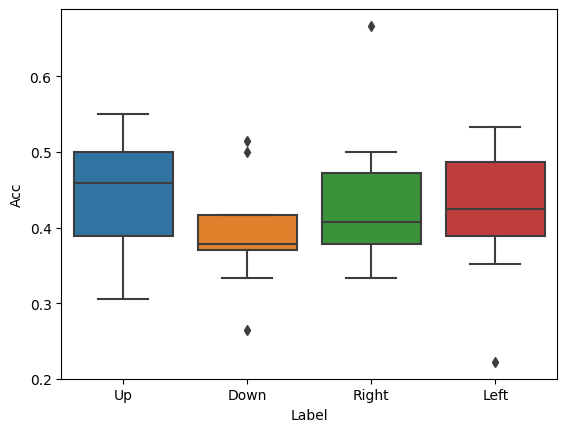

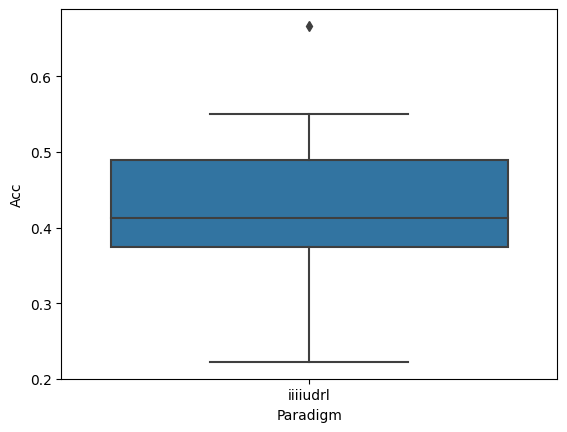

,Unnamed: 0,Acc,Sub,Feat,Kernel,C,Label,Paradigm
0,0,0.550000,1,fftDatapeakTime4SortedSep14_&_normData_GR_CVla...,rbf,2.5,Up,iiiiudrl
1,1,0.333333,2,gausDatapeakTime4SortedSep14_&_gausData_GRpeak...,linear,2.5,Up,iiiiudrl
2,2,0.537037,3,fftData_CV_BCpeakTime4SortedSep14_&_gausData_B...,rbf,2.5,Up,iiiiudrl
3,3,0.500000,4,fftDataconstTimeSortedSep14_&_normData_GR_BC_C...,linear,2.5,Up,iiiiudrl
4,4,0.388889,5,gausData_BC_CVconstTimeSortedSep14_&_stftData_...,sigmoid,2.5,Up,iiiiudrl
5,5,0.469697,6,stftData_CVpeakTime4SortedSep14_&_normData_GR_...,sigmoid,2.5,Up,iiiiudrl
6,6,0.305556,7,fftData_BClateTimeSortedSep14_&_fftDatalateTim...,rbf,2.5,Up,iiiiudrl
7,7,0.433333,8,hilbertDatapeakTime4SortedSep14_&_hilbertData_...,rbf,2.5,Up,iiiiudrl
8,8,0.458333,9,gausData_GR_BClateTimeSortedSep14_&_hilbertDat...,sigmoid,2.5,Up,iiiiudrl
9,9,0.333333,1,normData_GR_BC_CVpeakTime4SortedSep14_&_normDa...,linear,2.5,Down,iiiiudrl


In [43]:

genSavePath = f"{os.getcwd()}/topFeaturesResults/"
import paradigmSetting as pa
paradigms = [ pa.upDownInner()[0], pa.upDownVis()[0], pa.rightLeftVis()[0], pa.rightLeftInner()[0], pa.upDownRightLeftVis()[0], pa.upDownRightLeftInner()[0]]
types = ["I","V"]
comboNr = [1,2,3,4]
results = []
for para in paradigms:
    topFeatures = []
    for nr in comboNr:
        path = glob.glob(genSavePath + f"topPerSubj-para-{para}-cmb-{nr}*")
        if len(path) > 0:
            topFeatures = path
    if len(topFeatures)>0:
        #results.append(np.load(topFeatures[0], allow_pickle=True))
        results = (pd.read_csv(topFeatures[0]).squeeze())
        print(pd.read_csv(topFeatures[0]).shape)
        
# print(len(results))
results = pd.DataFrame(results)
# avgAccs = []
# for sub in (np.arange(9)+1):
#     print(sub)
# results["avgAcc"] = results["Acc"][results["Sub"] == 1]

#print(results)
pd.to_numeric(results["Acc"])
plt.figure()
sns.relplot(data = results, y="Acc", x = "Sub", col="Label")
plt.show()
plt.figure()
sns.boxplot(data = results, y="Acc", x = "Sub")
plt.show()
plt.figure()
sns.boxplot(data = results, y="Acc", x = "Label")
plt.show()
plt.figure()
sns.boxplot(data = results, y="Acc", x = "Paradigm")
plt.show()
#print(results.name.unique())
results[results["Paradigm"] == "vvvvudrl"]
results


In [44]:
#results = np.array(results,dtype=object)
# print(results.shape) # Paradigm, subject, top2, [acc, sub, name, kern, C]
# print(results[0])
# print(results[0,0])
# print(results[1])
# results = results[:,:,0,:]
# # print(results[0,1,1])
# # print(results[0,1])
# bestPerSub = np.zeros([results.shape[0], results.shape[1]])
# for ind, para in enumerate(results):
#     for subj in para:
#         # print(subj[0])
#         # print(int(subj[1]))
#         bestPerSub[ind, int(subj[1])-1] = subj[0]
# bestPerSub = np.array(bestPerSub)
# combos = []
# for para in paradigms:
#     for type in types:
#         combos.append(f"{para}{type}")

jjjjsahd1
(36, 8)
jjjjsahd2
(36, 8)
jjjjsahd3
(36, 8)


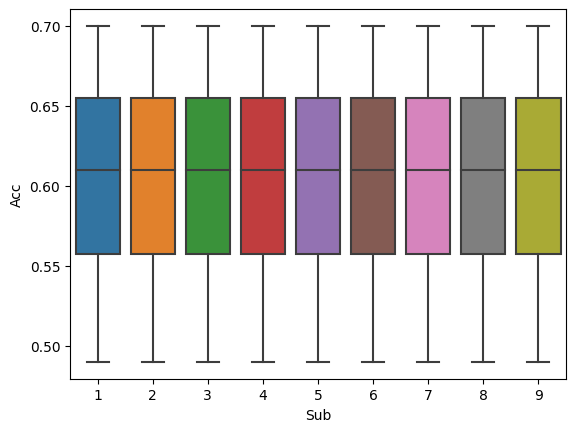

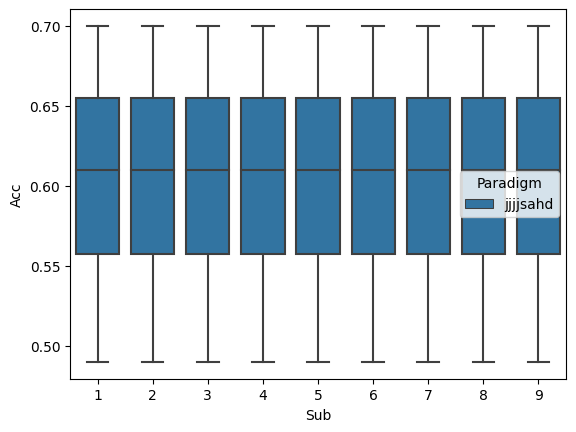

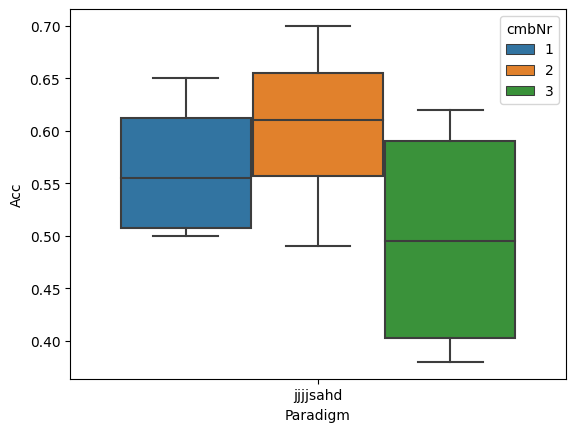

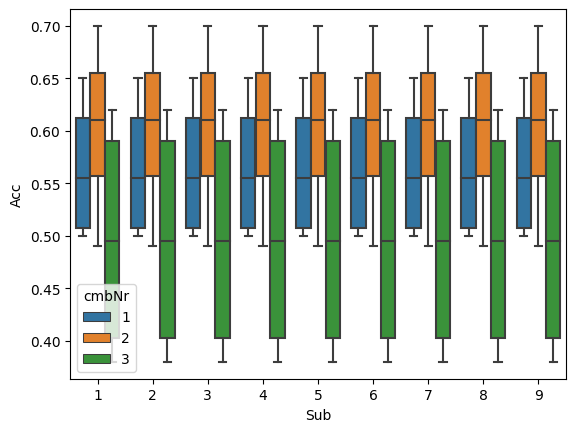

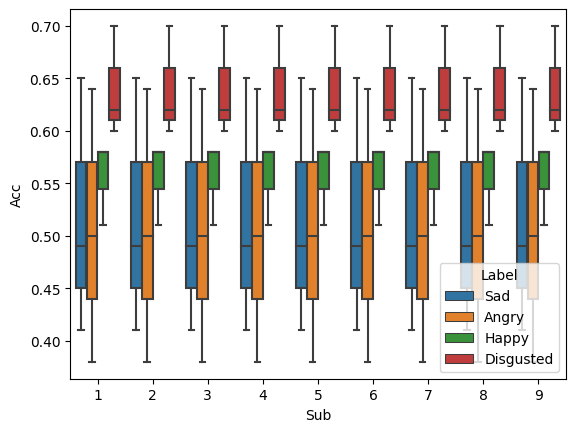

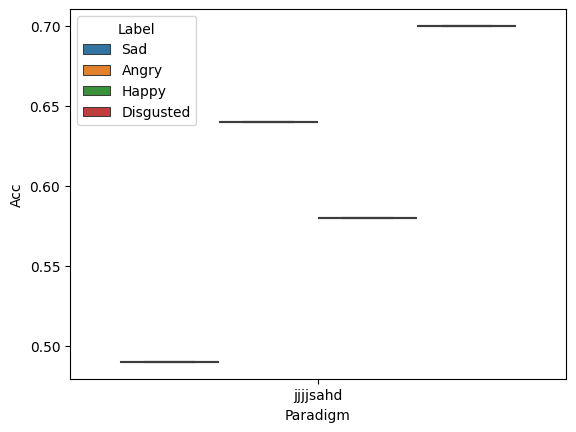

<Figure size 640x480 with 0 Axes>

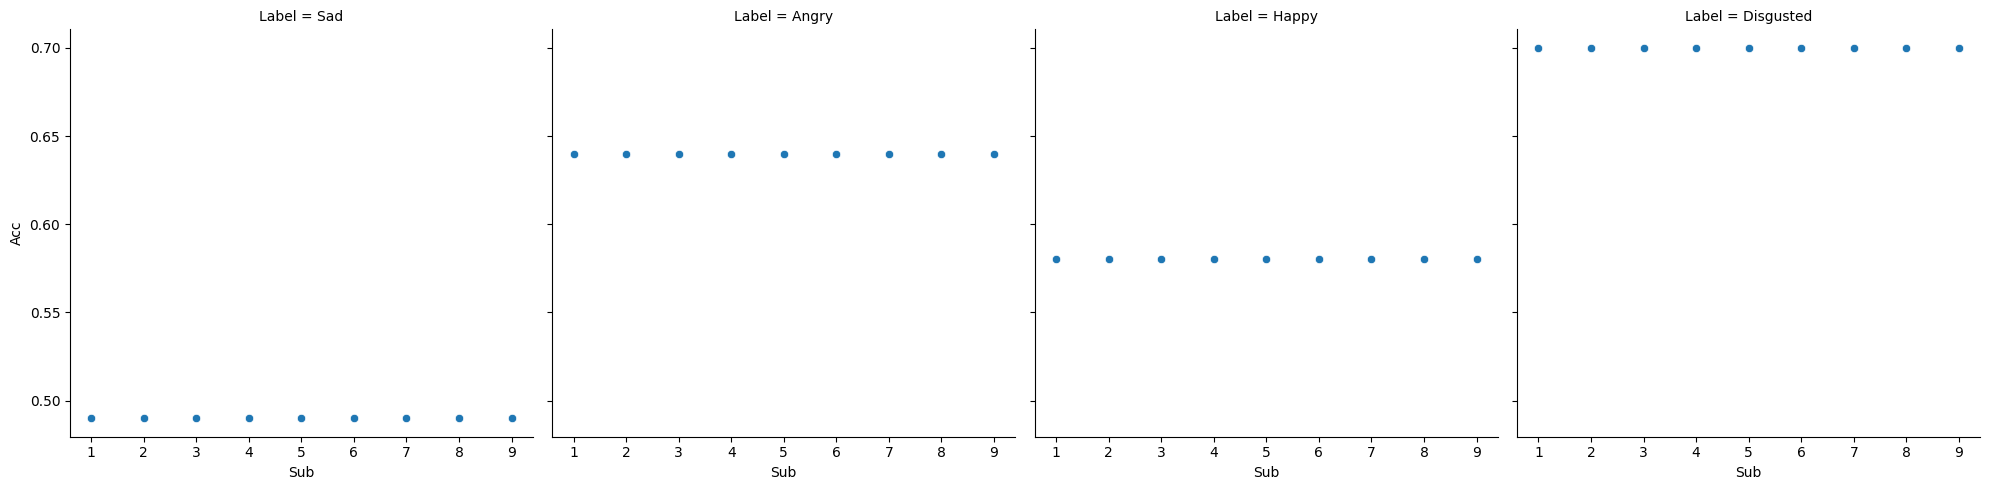

,Unnamed: 0,Acc,Sub,Feat,Kernel,C,Label,Paradigm,cmbNr
0,0,0.65,1,stftDatamyOwnTestSecond5,sigmoid,2.5,Sad,jjjjsahd,1
1,1,0.65,2,stftDatamyOwnTestSecond5,sigmoid,2.5,Sad,jjjjsahd,1
2,2,0.65,3,stftDatamyOwnTestSecond5,sigmoid,2.5,Sad,jjjjsahd,1
3,3,0.65,4,stftDatamyOwnTestSecond5,sigmoid,2.5,Sad,jjjjsahd,1
4,4,0.65,5,stftDatamyOwnTestSecond5,sigmoid,2.5,Sad,jjjjsahd,1
...,...,...,...,...,...,...,...,...,...
31,31,0.62,5,fftDatamyOwnTestFirst1to80withDiff5_&_stftData...,rbf,2.5,Disgusted,jjjjsahd,3
32,32,0.62,6,fftDatamyOwnTestFirst1to80withDiff5_&_stftData...,rbf,2.5,Disgusted,jjjjsahd,3
33,33,0.62,7,fftDatamyOwnTestFirst1to80withDiff5_&_stftData...,rbf,2.5,Disgusted,jjjjsahd,3
34,34,0.62,8,fftDatamyOwnTestFirst1to80withDiff5_&_stftData...,rbf,2.5,Disgusted,jjjjsahd,3


In [45]:
# Using Hold
genSavePath = f"{os.getcwd()}/topFeaturesResultsHold/"
#genSavePath = f"{os.getcwd()}/topBestFeaturesResults/"
import paradigmSetting as pa # [
paradigms = [pa.sadAngryHappyDisgustedJulia()[0], ] #  pa.upDownInner()[0], pa.upDownVis()[0], pa.rightLeftVis()[0], pa.rightLeftInner()[0], pa.upDownRightLeftVis()[0], pa.upDownRightLeftInner()[0]
comboNr = [1,2,3,4,5,6]
first = True
for para in paradigms:
    
    for nr in comboNr:
        topFeatures = []
        path = glob.glob(genSavePath + f"topPerSubj-para-{para}-cmb-{nr}*")
        if len(path) > 0:
            topFeatures = path
        if len(topFeatures)>0:
            #results.append(np.load(topFeatures[0], allow_pickle=True))
            if first:
                results = (pd.read_csv(topFeatures[0]).squeeze())
                results["cmbNr"] = nr
                first = False
                print(f"{para}{nr}")

            else:
                # print(topFeatures)
                print(f"{para}{nr}")
                newResults = pd.read_csv(topFeatures[0]).squeeze()
                newResults["cmbNr"] = nr
                results = pd.concat([results, newResults])
                

            print(pd.read_csv(topFeatures[0]).shape)
        
# print(len(results))
results = pd.DataFrame(results)
# avgAccs = []
# for sub in (np.arange(9)+1):
#     print(sub)
# results["avgAcc"] = results["Acc"][results["Sub"] == 1]

#print(results)
comboNrFrames = []
highestCombo = 2
for nr in comboNr:
    comboNrFrames.append(results[results["cmbNr"] == nr])
pd.to_numeric(results["Acc"])

plt.figure()
sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub")
plt.show()
plt.figure()
sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub", hue="Paradigm")
plt.show()
# plt.figure()
# sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Label")
# plt.show()
plt.figure()
sns.boxplot(data = results, y="Acc", x = "Paradigm", hue = "cmbNr")
plt.show()
plt.figure()
sns.boxplot(data = results, y="Acc", x = "Sub", hue = "cmbNr")
plt.show()
plt.figure()
sns.boxplot(data = results, y="Acc", x = "Sub", hue = "Label")
plt.show()
plt.figure()
sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Paradigm", hue= "Label")
plt.show()
plt.figure()
sns.relplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub", col="Label")
plt.show()
results[results["Paradigm"] == "vvvvudrl"]
results



jjjjsahd1
(9, 8)
jjjjsahd2
(9, 8)
jjjjsahd3
(9, 8)


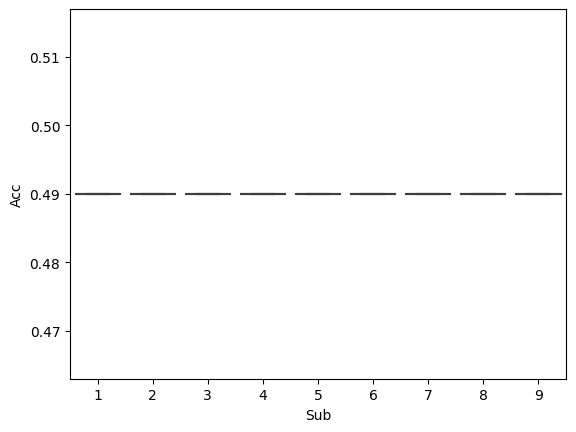

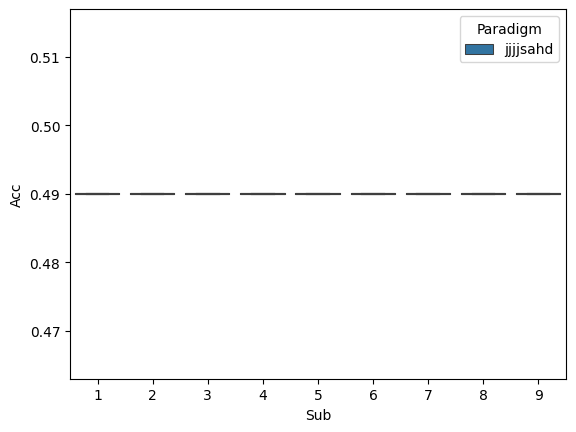

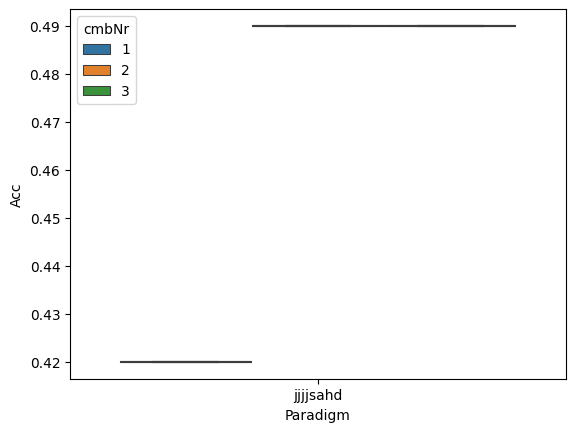

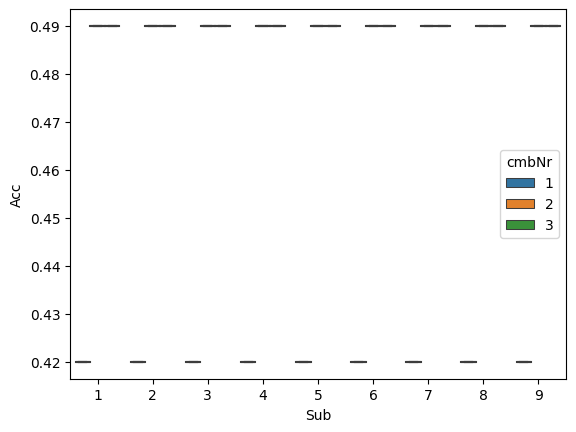

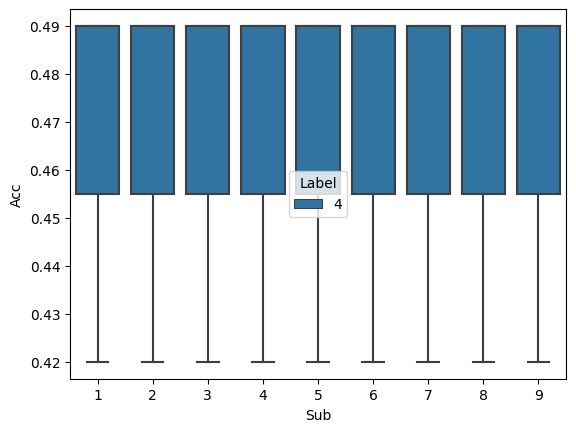

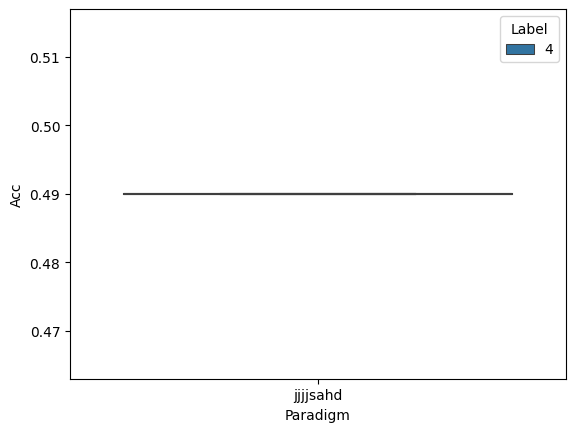

<Figure size 640x480 with 0 Axes>

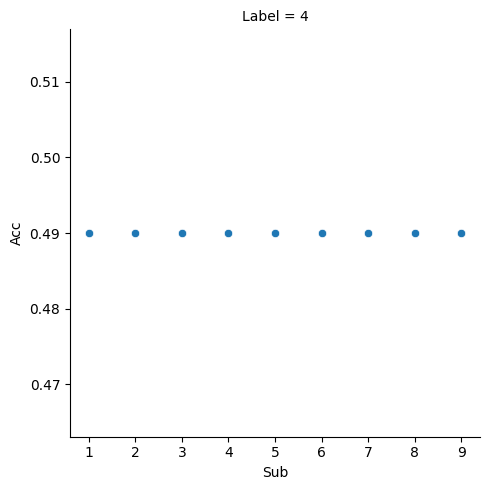

,Unnamed: 0,Acc,Sub,Feat,Kernel,C,Label,Paradigm,cmbNr
0,0,0.42,1,stftData_GRmyOwnTestThird5,rbf,2.5,4,jjjjsahd,1
1,1,0.42,2,stftData_GRmyOwnTestThird5,rbf,2.5,4,jjjjsahd,1
2,2,0.42,3,stftData_GRmyOwnTestThird5,rbf,2.5,4,jjjjsahd,1
3,3,0.42,4,stftData_GRmyOwnTestThird5,rbf,2.5,4,jjjjsahd,1
4,4,0.42,5,stftData_GRmyOwnTestThird5,rbf,2.5,4,jjjjsahd,1
5,5,0.42,6,stftData_GRmyOwnTestThird5,rbf,2.5,4,jjjjsahd,1
6,6,0.42,7,stftData_GRmyOwnTestThird5,rbf,2.5,4,jjjjsahd,1
7,7,0.42,8,stftData_GRmyOwnTestThird5,rbf,2.5,4,jjjjsahd,1
8,8,0.42,9,stftData_GRmyOwnTestThird5,rbf,2.5,4,jjjjsahd,1
0,0,0.49,1,fftData_BCmyOwnTestSecond5_&_stftData_GRmyOwnT...,rbf,2.5,4,jjjjsahd,2


In [46]:
# Using Hold
genSavePath = f"{os.getcwd()}/topFeaturesResultsHold/"
#genSavePath = f"{os.getcwd()}/topBestFeaturesResults/"
import paradigmSetting as pa # [
paradigms = [pa.sadAngryHappyDisgustedJulia()[0], ] #  pa.upDownInner()[0], pa.upDownVis()[0], pa.rightLeftVis()[0], pa.rightLeftInner()[0], pa.upDownRightLeftVis()[0], pa.upDownRightLeftInner()[0]
comboNr = [1,2,3,4,5,6]
first = True
for para in paradigms:
    
    for nr in comboNr:
        topFeatures = []
        path = glob.glob(genSavePath + f"topPerSubjAvg-para-{para}-cmb-{nr}*")
        if len(path) > 0:
            topFeatures = path
        if len(topFeatures)>0:
            #results.append(np.load(topFeatures[0], allow_pickle=True))
            if first:
                results = (pd.read_csv(topFeatures[0]).squeeze())
                results["cmbNr"] = nr
                first = False
                print(f"{para}{nr}")

            else:
                # print(topFeatures)
                print(f"{para}{nr}")
                newResults = pd.read_csv(topFeatures[0]).squeeze()
                newResults["cmbNr"] = nr
                results = pd.concat([results, newResults])
                

            print(pd.read_csv(topFeatures[0]).shape)
        
# print(len(results))
results = pd.DataFrame(results)
# avgAccs = []
# for sub in (np.arange(9)+1):
#     print(sub)
# results["avgAcc"] = results["Acc"][results["Sub"] == 1]

#print(results)
comboNrFrames = []
highestCombo = 2
for nr in comboNr:
    comboNrFrames.append(results[results["cmbNr"] == nr])
pd.to_numeric(results["Acc"])

plt.figure()
sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub")
plt.show()
plt.figure()
sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub", hue="Paradigm")
plt.show()
# plt.figure()
# sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Label")
# plt.show()
plt.figure()
sns.boxplot(data = results, y="Acc", x = "Paradigm", hue = "cmbNr")
plt.show()
plt.figure()
sns.boxplot(data = results, y="Acc", x = "Sub", hue = "cmbNr")
plt.show()
plt.figure()
sns.boxplot(data = results, y="Acc", x = "Sub", hue = "Label")
plt.show()
plt.figure()
sns.boxplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Paradigm", hue= "Label")
plt.show()
plt.figure()
sns.relplot(data = comboNrFrames[highestCombo-1], y="Acc", x = "Sub", col="Label")
plt.show()
results[results["Paradigm"] == "vvvvudrl"]
results

In [47]:

# print(results.shape)
# print(np.array(combos).shape)
# newRes = []
# for para, comb in zip(results, combos):
#     for sub in para:
#         newRes.append(np.concatenate([sub, [comb]]))
#         #print(np.concatenate([sub,["hi"]]))
# print(np.array(newRes).shape)
# print(np.array(newRes)[2])

#     # np.hstack()
#     # print(para[:])
#     # print(comb)
#     # np.hstack([para, comb], axis=1)

In [48]:
# df = pd.DataFrame(bestPerSub.T, index=subNames, columns=combos)
# df2 = pd.DataFrame(bestPerSub, index=combos, columns=subNames)
# df3 = pd.DataFrame(bestPerSub.T)

# df4 = pd.DataFrame(newRes, columns=["Accuracy", "Subjects", "Feature", "Kernel", "C", "Paradigm"] )
# # sns.relplot(data=df4, x="Paradigm", y="Subjects")
# # sns.relplot(data=df2)
# # sns.barplot(data=df4, x="Paradigm", y="Accuracy")
# sns.swarmplot(data=df2)
# # sns.relplot(df4)
# # sns.relplot(data=df3, row_order=subjects)

In [49]:
# plt.figure(figsize=[15,10])
# plt.boxplot(bestPerSub)
# combos = []
# for para in paradigms:
#     for type in types:
#         combos.append(f"{para}{type}")
# #plt.legend(combos)
# subjects = [1,2,3,4,5,6,7,8,9]
# plt.xticks(np.arange(len(subjects))+1, subjects,rotation=20)
# plt.title("Best Per paradigm for each subject")
# print("")

In [50]:
# onlyInner = bestPerSub[0::2, :]
# onlyVis = bestPerSub[1::2, :]

# plt.figure(figsize=[15,10])
# plt.boxplot(onlyInner)
# combos = []
# for para in paradigms:
#     for type in types:
#         combos.append(f"{para}{type}")
# print(combos[0::2])
# print(combos[1::2])
# print(combos)
# #plt.legend(combos)
# subjects = [1,2,3,4,5,6,7,8,9]
# plt.xticks(np.arange(len(subjects))+1, subjects,rotation=20)
# plt.title("Best Per Inner speech paradigm for each subject")
# print("")
# plt.figure(figsize=[15,10])
# plt.boxplot(onlyVis)
# combos = []
# for para in paradigms:
#     for type in types[0]:
#         combos.append(f"{para}{type}")
# #plt.legend(combos)
# subjects = [1,2,3,4,5,6,7,8,9]
# plt.xticks(np.arange(len(subjects))+1, subjects,rotation=20)
# plt.title("Best Per Visualized paradigm for each subject")
# print("")

In [51]:
# paradigms = ["ud", "rl", "udrl"]
# types = ["I","V"]
# combos = []
# for para in paradigms:
#     for type in types:
#         combos.append(f"{para}{type}")
# combos

In [52]:
# bestPerSub = np.zeros([results.shape[0], results.shape[1]])
# for paraNr, para in enumerate(results):
#     print(paraNr)
#     for subj in para:
#         print(paraNr)
#         # for x in subj[0]:
#         # bestPerSub[paraNr, int(subj[1])] = subj[0] 

# print(results.shape)
# plt.figure(figsize=[15,10])
# plt.boxplot(bestPerSub)
# # each row is a subject. Each column is a paradigm. Each value is best result for that subject/paradigm
# # udInner, udVis, rlInner, rlVis, udrlInner, udrlVis
# bestResultsPerParadigm = np.array([[0.98,   1,  0.96,   0.98,   0.75,   0.7],
#                                    [1,  1,  1,  1,  0.79,   0.76],
#                                    [0.97,   0.96,   0.98,   0.97,   0.78,   0.66], 
#                                    [1,  1,  1,  0.98,   0.79,   0.78], 
#                                    [1,  1,  1,  1,  0.8,    0.81], 
#                                    [0.94,   0.96,   0.96,  0.97,    0.73,   0.75], 
#                                    [1,  1,  0.98,   1,  0.76,   0.76], 
#                                    [1,  0.98,   1,  1,  0.75,   0.75],
#                                    [1,  1,  0.98,   1,  0.76,   0.74]])

# # First boxplot: first dim should be best results for all subjects for one "paradigm/word combo", second and onwards same but new paradigm
# # Second boxplot: Each dim should be a separate feature, containing best result for each subject. Do one plot each per paradigm
# # Third boxplot: Each dim should be best average result over all subjects for one paradigm/word combo. .... next dims, second best average mby not
# # This third one is not really boxplot. More like, Like "tower" plot
# # Do one boxplot per each paradigm. Start with these!
# # Then, better explain all the steps. 
# plt.figure(figsize=[15,10])
# plt.boxplot(bestResultsPerParadigm)
# plt.legend(["udInner", "udVis", "rlInner"," rlVis", "udrlInner", "udrlVis"])
# plt.figure(figsize=[22,10])
# plt.boxplot(bestResultsPerParadigm.T)
# plt.legend([f"sub ject {1}", f"sub ject {2}", f"sub ject {3}",f"sub ject {4}", f"sub ject {5}", f"sub ject {6}"f"sub ject {7}", f"sub ject {8}", f"sub ject {9}"])


# print("")

In [53]:
# # each row is a subject, each column is a feature. Each value in each one is best result for one subject for that feature

# upDownLeftRightInnerBestResultsPerFeature = np.array([
#                                    [2,3],
#                                    [4,5],
#                                    [4,5], 
#                                    [4,5], 
#                                    [4,5], 
#                                    [4,5], 
#                                    [4,5], 
#                                    [4,5],
#                                    [4,5]])

# plt.figure()
# plt.boxplot(upDownLeftRightInnerBestResultsPerFeature)
# print("")


# # Top ten highest accuracies, up down inner,  one feature. Here though. I need to go through
# # each feature in makeTables

# # Accuracy 0.94 : subject 8, feature:-dataFFTCV-BC, kernelsigmoid, C:10

# # Accuracy 0.94 : subject 5, feature:-dataWCV-BC, kernelrbf, C:10

# # Accuracy 0.91 : subject 1, feature:-dataFFTCV-BC, kernelrbf, C:0.5

# # Accuracy 0.9 : subject 4, feature:-dataFFTCV-BC, kernellinear, C:2.5

# # Accuracy 0.87 : subject 7, feature:-dataFFTCV-BC, kernelrbf, C:1.2

# # Accuracy 0.87 : subject 2, feature:-dataWCV-BC, kernelsigmoid, C:2.5

# # Accuracy 0.84 : subject 9, feature:-dataWCV-BC, kernelrbf, C:10

# # Accuracy 0.84 : subject 6, feature:-dataWCV-BC, kernelrbf, C:0.5

# # Accuracy 0.77 : subject 3, feature:-dataFFTCV-BC, kernelrbf, C:10

In [54]:

# # Accuracy 0.84 : subject 9, feature:-dataWCV-BC, kernelrbf, C:10

# # Accuracy 0.84 : subject 6, feature:-dataWCV-BC, kernelrbf, C:0.5

# # Accuracy 0.99 : subject 8, feature:dataHRCV-BCcn3-dataWCV-BC--dataFFTCV-BC, kernelrbf, C:0.5

# # Accuracy 0.99 : subject 5, feature:dataHRCV-BCcn3--dataWCV-BC, kernelrbf, C:10

# # Accuracy 0.98 : subject 7, feature:welchDatacn3BC-dataWCV-BC--dataFFTCV-BC, kernellinear, C:2.5

# # Accuracy 0.97 : subject 4, feature:welchDatacn3BC-dataHRCV-BC--dataWCV-BC, kernellinear, C:2.5

# # Accuracy 0.92 : subject 1, feature:dataHRCV-BC-dataWCV-BC--dataFFTCV-BC, kernelrbf, C:2.5

# # Accuracy 0.91 : subject 2, feature:welchDatacn3BC-dataWCV-BC--dataFFTCV-BC, kernelrbf, C:5

# # Accuracy 0.79 : subject 3, feature:dataWCV-BC--dataFFTCV-BC, kernelrbf, C:10

# # each row is a subject, each column is a feature. Each value in each one is best result for one subject for that feature
# upDownInnerBestResultsPerFeature = np.array([
#                                    [2,3],
#                                    [4,5],
#                                    [4,5], 
#                                    [4,5], 
#                                    [4,5], 
#                                    [4,5], 
#                                    [4,5], 
#                                    [4,5],
#                                    [4,5]])

# plt.figure()
# plt.boxplot(upDownInnerBestResultsPerFeature)
# print("")

In [55]:
# Average on up down inner, best
# welchDatacn3BC-dataWCV-BC--dataFFTCV-BC
# rbf
# 0.876337822671156